In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('dark_background')

In [5]:
import scipy.stats

results_dir = Path.cwd() / "../results/intensity_classification_per_mol/"

In [6]:
# result_filename = "intensity_classification_all_feat.csv"
# result_filename = "intensity_classification_fingerprints_feat.csv"
result_filename = "intensity_classification_mol_feat.csv"
# result_filename = "intensity_classification_one_random_mol_feat.csv"

detection_results = pd.read_csv(results_dir / result_filename, index_col = 0)
detection_results = detection_results.rename(columns={'Matrix short': 'matrix',
                                                      'Polarity': 'polarity'})
detection_results

,observed_value,prediction,classifier,name_short,matrix,polarity,fold
0,2,2,Logistic_reg,2-Oxoglutaric acid,9AA,negative,0
1,1,2,Logistic_reg,3-Hydroxyanthranilic acid,9AA,negative,0
2,0,2,Logistic_reg,3-Hydroxymethylglutaric acid,9AA,negative,0
3,3,2,Logistic_reg,3-Phosphoglyceric acid,9AA,negative,0
4,3,2,Logistic_reg,"4,5-Dihydroorotic acid",9AA,negative,0
...,...,...,...,...,...,...,...
107,1,1,MLP,Xanthine,pNA,positive,9
108,1,0,MLP,alpha-tocopherol,pNA,positive,9
109,1,0,MLP,cis-Aconitic acid,pNA,positive,9
110,1,1,MLP,gamma-Aminobutyric acid,pNA,positive,9


In [7]:
from sklearn.metrics import classification_report

classes = np.sort(list(detection_results.observed_value.unique()))

score_cols = ['macro_avg_f1_score']
for c in classes: score_cols += ['P_'+str(c), 'R_'+str(c), 'f1_'+str(c), '%_'+str(c)]

detection_metrics = pd.DataFrame(columns = ['matrix', 'polarity', 'classifier'] + score_cols)

counter = 0
for (matrix, polarity, classifier), rows in detection_results.groupby(['matrix', 'polarity', 'classifier']):
    clf_report = classification_report(rows.observed_value, rows.prediction, output_dict = True, zero_division=0)
    if rows.observed_value.max() == 0:
        print("no detection!")
    
    metrics = [clf_report['macro avg']['f1-score']]
    for c in classes: 
        loc_m = [0,0,0,0]
        if str(c) in clf_report.keys():
            loc_m = [clf_report[str(c)]['precision'], clf_report[str(c)]['recall'],
                                clf_report[str(c)]['f1-score'], clf_report[str(c)]['support']/clf_report['macro avg']['support']]
        metrics += loc_m
    
    detection_metrics.loc[counter] = [matrix, polarity, classifier] + metrics
    counter += 1

best_det_macro_avg_f1 = detection_metrics.loc[detection_metrics.groupby(['matrix', 'polarity'])["macro_avg_f1_score"].idxmax()].sort_values("macro_avg_f1_score", ascending=False)
best_det_macro_avg_f1 = np.round(best_det_macro_avg_f1, decimals=2)
best_det_macro_avg_f1

,matrix,polarity,classifier,macro_avg_f1_score,P_0,R_0,f1_0,%_0,P_1,R_1,...,f1_2,%_2,P_3,R_3,f1_3,%_3,P_4,R_4,f1_4,%_4
45,ClCCA,negative,MLP,0.79,0.94,0.88,0.91,0.80,0.61,0.76,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
101,NEDC,negative,MLP,0.76,0.92,0.88,0.90,0.80,0.58,0.67,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,9AA,negative,RandomForest,0.52,0.69,0.54,0.61,0.30,0.70,0.68,...,0.40,0.14,0.48,0.37,0.42,0.16,0.38,0.67,0.48,0.07
59,DAN,negative,MLP,0.51,0.66,0.62,0.64,0.36,0.66,0.63,...,0.31,0.13,0.40,0.50,0.44,0.02,0.00,0.00,0.00,0.00
16,CHCA,negative,Logistic_reg,0.49,0.90,0.81,0.85,0.65,0.61,0.43,...,0.17,0.05,0.30,0.75,0.43,0.02,0.00,0.00,0.00,0.00
31,CMBT,negative,MLP,0.47,0.92,0.88,0.90,0.83,0.45,0.56,...,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25,CHCA,positive,RandomForest,0.46,0.43,0.52,0.47,0.15,0.67,0.55,...,0.39,0.23,0.19,0.36,0.25,0.08,0.67,0.50,0.57,0.02
88,DHB,negative,RandomForest,0.44,0.88,0.81,0.85,0.67,0.52,0.54,...,0.38,0.05,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00
40,CMBT,positive,SVC_poly,0.44,0.66,0.68,0.67,0.37,0.71,0.71,...,0.29,0.09,0.50,0.60,0.55,0.03,0.00,0.00,0.00,0.01
83,DHAP,positive,SVC_rbf,0.42,0.64,0.72,0.68,0.43,0.67,0.61,...,0.36,0.07,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00


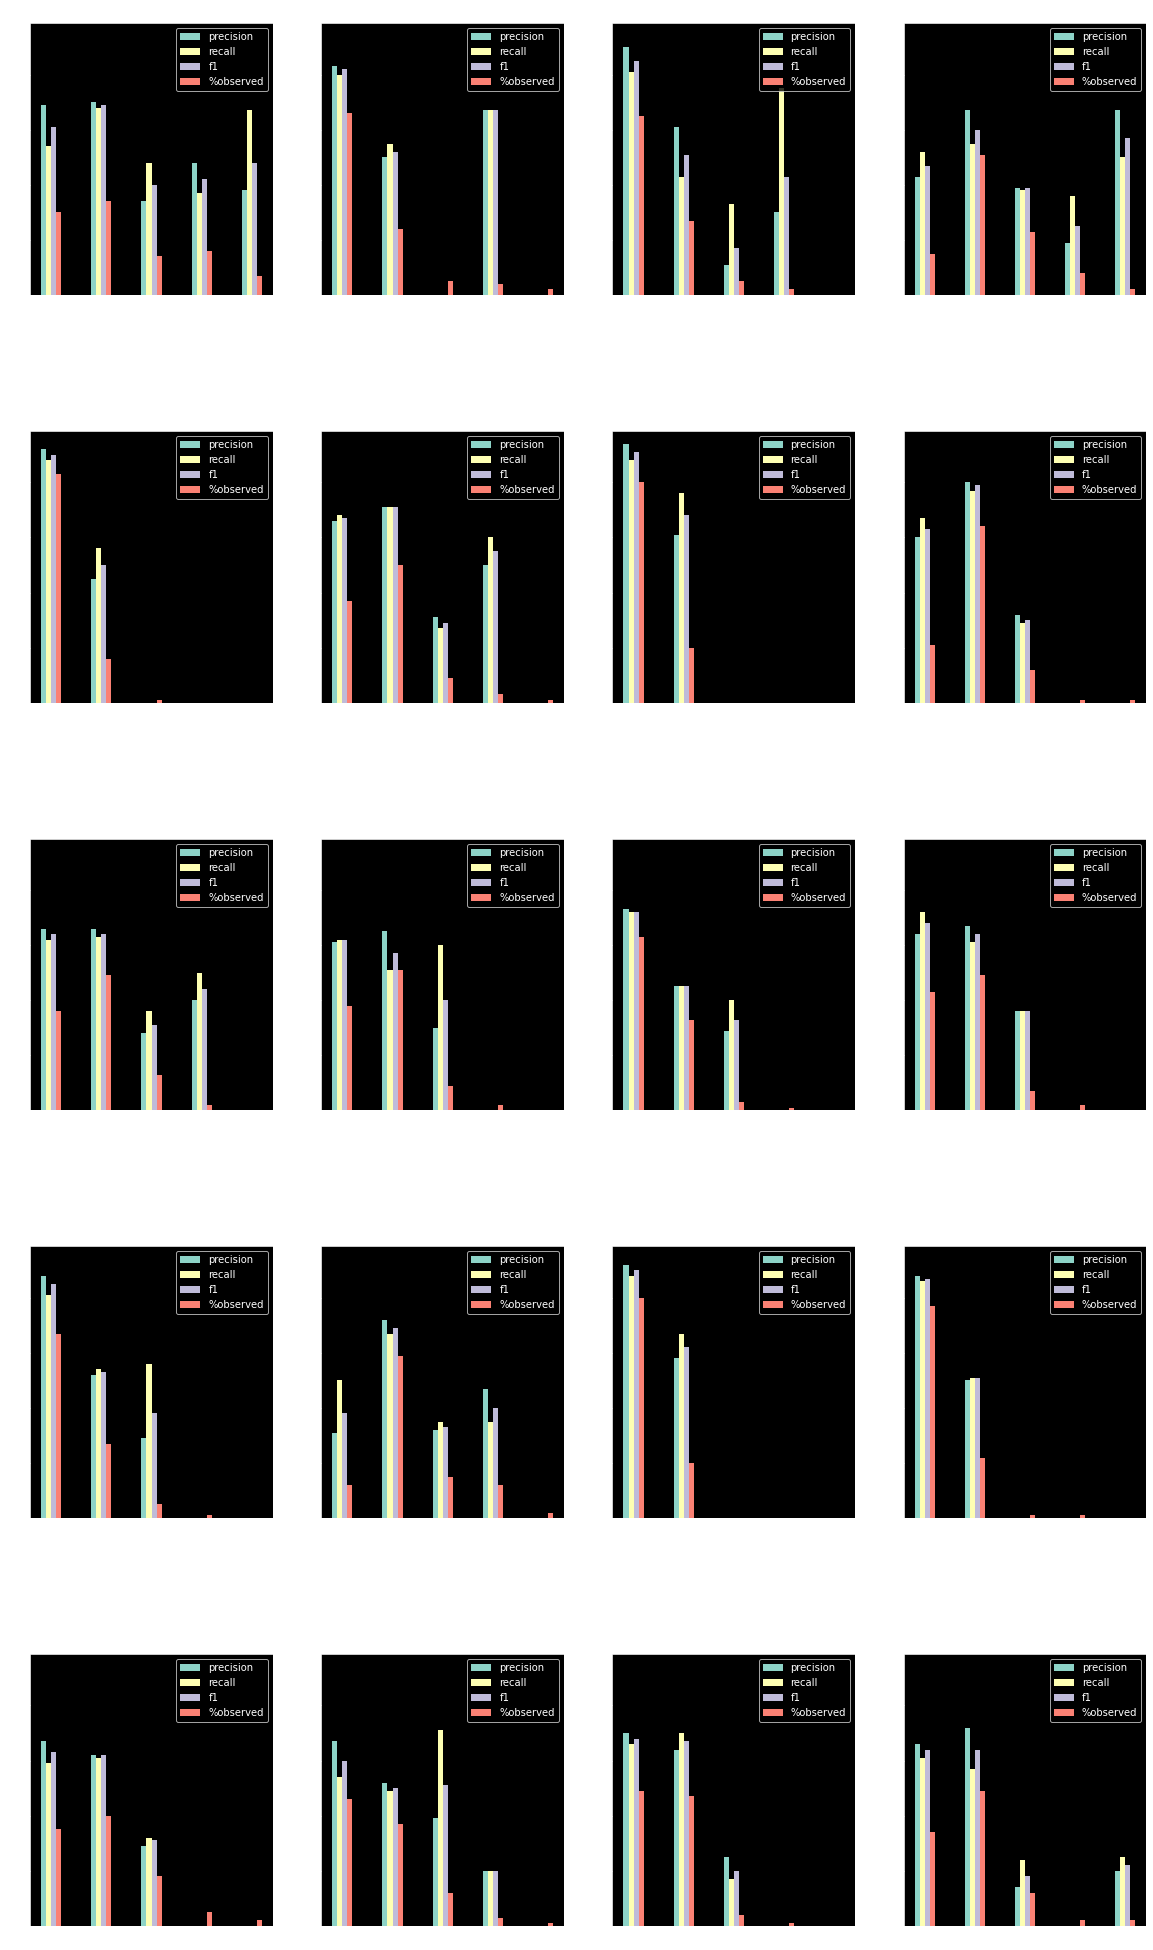

In [8]:
fig, axes = plt.subplots(ncols=4,nrows=5, sharey=True, figsize= (20, 35))
ax_list = axes.flat

metric = "macro_avg_f1_score"
#metric = "RMSE"

i = 0
for (matrix, polarity), rows in best_det_macro_avg_f1.groupby(['matrix', 'polarity']):
    row = rows.iloc[0]
    
    X = classes
    X_axis = np.arange(len(X))
    
    class_df = pd.DataFrame(index = classes, columns = ['precision', 'recall', 'f1', '%observed'])
    for c in classes:
        class_df.loc[c] = row[['P_'+str(c), 'R_'+str(c), 'f1_'+str(c), '%_'+str(c)]].values
    
    ax_list[i].bar(X_axis - 0.1, class_df['precision'].values, 0.1, label = 'precision')
    ax_list[i].bar(X_axis - 0.0, class_df['recall'].values, 0.1, label = 'recall')
    ax_list[i].bar(X_axis + 0.1, class_df['f1'].values, 0.1, label = 'f1')
    ax_list[i].bar(X_axis + 0.2, class_df['%observed'].values, 0.1, label = '%observed')
    
    ax_list[i].set_xticks(X_axis)
    ax_list[i].set_xticklabels(X)
    ax_list[i].legend(loc = 'upper right')
    ax_list[i].set_title(f"{matrix}-{polarity}-{row.classifier}")
    
    i+=1

plt.subplots_adjust(hspace=0.5)

plt.show()